In [2]:
import nltk
import pandas as pd
import sys

sys.path.append('../../')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from src.modules.pipeline.balancing import Balancing
from src.modules.pipeline.cross_validation import CrossValidation
from src.modules.pipeline.finetunning import Finetunning
from src.modules.preprocess.preprocess import Preprocess
from src.modules.util.constant import Features, Model, ModelName as mn
from src.modules.util.helper_metrics import MetricsHelper as mh
from src.modules.util.util import Util as util
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('punkt')

## Loading Data

#### Models

In [3]:
NB = Model.NB
LG = Model.LG
DT = Model.DT
RF = Model.RF
GB = Model.GB
CV = Model.CV

In [ ]:
# BALANCE_PATH = '../data/balanced/balanced_data.csv'

# data = pd.read_csv('../data/bg_results.csv', engine='python', quoting=3, header=0, sep='§')
# data.drop(columns=Features.train_test_features, inplace=True, axis=1)

## Preprocess

In [ ]:
# data = pd.DataFrame.copy(data)

In [ ]:
# filing the null values whit empty string

# data['summary'].fillna('', inplace=True)
# data['total_words_summary'] = data.apply(lambda row: len(list(nltk.word_tokenize(row['summary']))), axis=1)

# data['description'].fillna('', inplace=True)
# data['total_words_description'] = data.apply(lambda row: len(list(nltk.word_tokenize(row['description']))), axis=1)

# data.drop(columns=Features.features, inplace=True, axis=1)
# data = data.dropna()

In [4]:
data = pd.read_csv('../data/data_preprocess.csv')

## Dummification

In [10]:
# data = pd.get_dummies(data)

### Data split

In [11]:
TRAIN, TEST = train_test_split(data, test_size=0.2)

## Balancing 

##### For balancind the data the follwoing chunks must be executed.

In [12]:
TRAIN = Balancing().oversample(TRAIN)

## Vectorization

In [13]:
train = TRAIN.drop('resolution', axis = 1)
y_train = TRAIN['resolution']

test = TEST.drop('resolution', axis=1)
y_test = TEST['resolution']

classes = TRAIN['resolution'].unique() 

In [14]:
vectorizer = TfidfVectorizer()

text_columns = train.select_dtypes(include=['object']).columns
x_train_vectorized = vectorizer.fit_transform(train[text_columns])

text_columns = test.select_dtypes(include=['object']).columns
x_test_vectorized =  vectorizer.transform(test[text_columns])

In [15]:
x_test_vectorized = pd.DataFrame(x_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
x_train_vectorized = pd.DataFrame(x_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

In [16]:
train_numeric = train.drop(text_columns, axis=1)
test_numeric = test.drop(text_columns, axis=1)

In [17]:
x_train = train_numeric.join(x_train_vectorized, lsuffix='_numeric', rsuffix='_vectorize')
x_test = test_numeric.join(x_test_vectorized, lsuffix='_numeric', rsuffix='_vectorize')

In [18]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

## Nomalization

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Machine Learning Models

#### Gaussian Naive Bayers

In [ ]:
# [x_train[c].apply(lambda x: print(x, c) if (str(x).isalpha() and str(x) not in ['nan', 'True', 'False']) else None) for c in x_train.columns]

Naive Bayes Metrics:

Accuracy score is:	5.11%
Precision score is:	58.03%
Recall score is:	5.11%
F1 score is:	2.88%
AUC score is:	74.98%


[[  85    0   58  103  691  307   92    2]
 [ 894   10 2067  133 2108 2306 1365   18]
 [   4    0    5    3   13    8   12    0]
 [  33    0   42  120  492   32   34    3]
 [  12    0   15   21  347   69   39    3]
 [   0    0    0    0    3    4    0    0]
 [  39    0   46   60  441   64  124    0]
 [  84    2   87  168  701  204   99    4]]
              precision    recall  f1-score   support

   DUPLICATE       0.07      0.06      0.07      1338
       FIXED       0.83      0.00      0.00      8901
    INACTIVE       0.00      0.11      0.00        45
  INCOMPLETE       0.20      0.16      0.18       756
     INVALID       0.07      0.69      0.13       506
       MOVED       0.00      0.57      0.00         7
     WONTFIX       0.07      0.16      0.10       774
  WORKSFORME       0.13      0.00      0.01      1349

    accuracy                

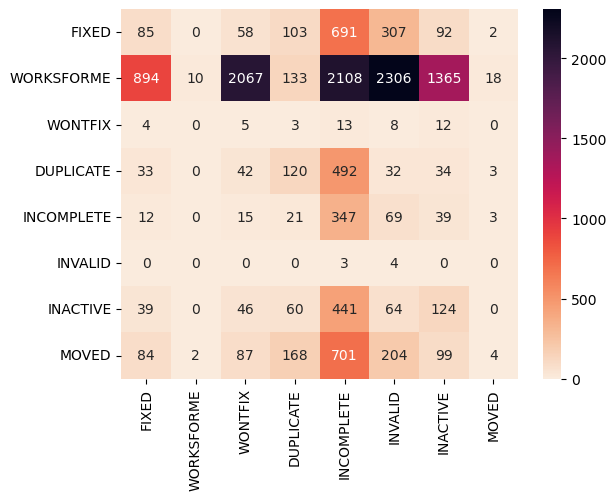

In [20]:
NB_metrics = util().get_metrics(NB, mn.NB, x_train, y_train, x_test, y_test, classes)

#### Logistic Regression

Logistic Regression Metrics:

Accuracy score is:	35.24%
Precision score is:	65.08%
Recall score is:	35.24%
F1 score is:	43.89%
AUC score is:	82.12%


[[ 139  138   56  210  254  256  166  119]
 [ 363 3783  566  182  403 2058 1185  361]
 [   4   11    8    9    3    2    6    2]
 [  32   31   52  318  150   12   81   80]
 [  32   37   34   90  148   57   81   27]
 [   0    1    0    0    0    6    0    0]
 [  38   84   54  159  113   42  232   52]
 [  85  130  107  309  224  144  164  186]]
              precision    recall  f1-score   support

   DUPLICATE       0.20      0.10      0.14      1338
       FIXED       0.90      0.43      0.58      8901
    INACTIVE       0.01      0.18      0.02        45
  INCOMPLETE       0.25      0.42      0.31       756
     INVALID       0.11      0.29      0.16       506
       MOVED       0.00      0.86      0.00         7
     WONTFIX       0.12      0.30      0.17       774
  WORKSFORME       0.22      0.14      0.17      1349

    accuracy     

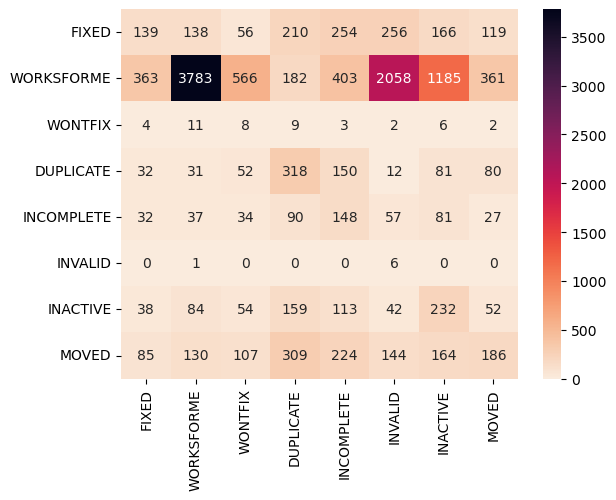

In [21]:
LG_metrics = util().get_metrics(LG, mn.LG, x_train, y_train, x_test, y_test, classes)

#### Decision Tree

Decision Tree Metrics:

Accuracy score is:	62.81%
Precision score is:	63.75%
Recall score is:	62.81%
F1 score is:	63.26%
AUC score is:	77.8%


[[ 326  422   14  108   93    1  109  265]
 [ 431 7388   20  137  173    4  289  459]
 [  11   12    1    6    1    0    6    8]
 [ 105  120    5  266   41    0   57  162]
 [  90  133    5   44   78    0   58   98]
 [   2    0    0    2    1    0    1    1]
 [ 121  254    1   50   60    0  153  135]
 [ 265  367    4  134   85    1  115  378]]
              precision    recall  f1-score   support

   DUPLICATE       0.24      0.24      0.24      1338
       FIXED       0.85      0.83      0.84      8901
    INACTIVE       0.02      0.02      0.02        45
  INCOMPLETE       0.36      0.35      0.35       756
     INVALID       0.15      0.15      0.15       506
       MOVED       0.00      0.00      0.00         7
     WONTFIX       0.19      0.20      0.20       774
  WORKSFORME       0.25      0.28      0.26      1349

    accuracy            

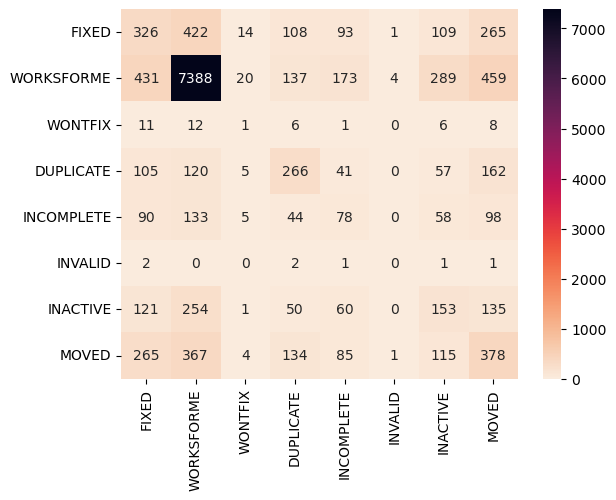

In [22]:
DT_metrics = util().get_metrics(DT, mn.DT, x_train, y_train, x_test, y_test, classes)

#### Random Forest

Random Forest Metrics:

Accuracy score is:	71.63%
Precision score is:	69.2%
Recall score is:	71.63%
F1 score is:	69.85%
AUC score is:	93.44%


[[ 406  444    1   70   31    0   66  320]
 [ 235 8296    0   22   26    0   84  238]
 [  10   15    0    2    0    0    5   13]
 [  96  116    0  312   14    0   26  192]
 [ 109  137    0   27   75    0   39  119]
 [   5    2    0    0    0    0    0    0]
 [ 135  267    0   35    9    0  150  178]
 [ 247  373    0   80   19    0   73  557]]


/home/lorena/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lorena/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lorena/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   DUPLICATE       0.33      0.30      0.31      1338
       FIXED       0.86      0.93      0.89      8901
    INACTIVE       0.00      0.00      0.00        45
  INCOMPLETE       0.57      0.41      0.48       756
     INVALID       0.43      0.15      0.22       506
       MOVED       0.00      0.00      0.00         7
     WONTFIX       0.34      0.19      0.25       774
  WORKSFORME       0.34      0.41      0.38      1349

    accuracy                           0.72     13676
   macro avg       0.36      0.30      0.32     13676
weighted avg       0.69      0.72      0.70     13676

time: 41.67121601104736


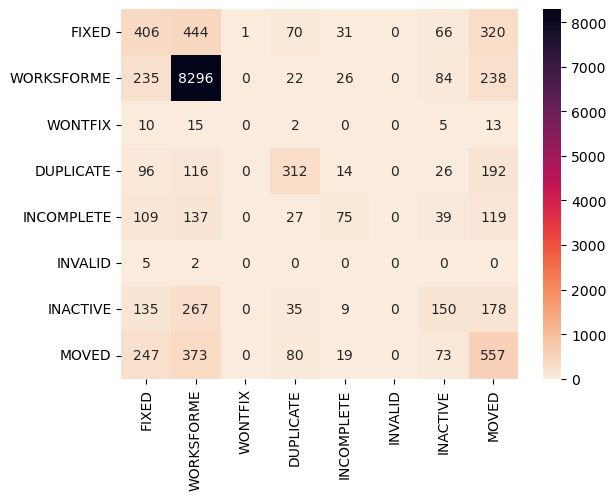

In [23]:
RF_metrics = util().get_metrics(RF, mn.RF, x_train, y_train, x_test, y_test, classes)

#### Gradient Boosting

Gradient Boosting Metrics:

Accuracy score is:	61.93%
Precision score is:	71.52%
Recall score is:	61.93%
F1 score is:	65.81%
AUC score is:	92.5%


[[ 402  141   74  141  190   63  181  146]
 [ 535 6938  172   90  204  121  588  253]
 [   7    4    8    2    1    0   14    9]
 [  67   21   55  386   41    4   85   97]
 [  96   36   21   55  134   12  100   52]
 [   2    1    0    0    2    2    0    0]
 [  93   69   72   73   46   14  326   81]
 [ 267  102  106  209  127   52  212  274]]
              precision    recall  f1-score   support

   DUPLICATE       0.27      0.30      0.29      1338
       FIXED       0.95      0.78      0.86      8901
    INACTIVE       0.02      0.18      0.03        45
  INCOMPLETE       0.40      0.51      0.45       756
     INVALID       0.18      0.26      0.21       506
       MOVED       0.01      0.29      0.01         7
     WONTFIX       0.22      0.42      0.29       774
  WORKSFORME       0.30      0.20      0.24      1349

    accuracy        

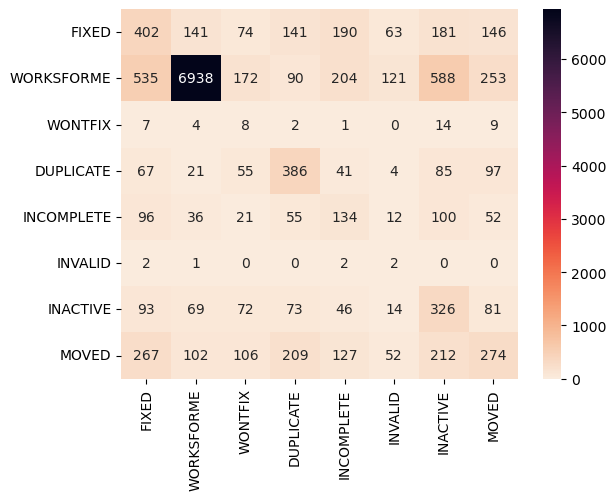

In [24]:
GB_metrics = util().get_metrics(GB, mn.GB, x_train, y_train, x_test, y_test, classes)

## Cross Validation

#### Gaussian Naive Bayers

In [25]:
NB_cv = CrossValidation().get_cross_validation_result(NB, x_train, y_train)
NB_cv

time: 5.339479684829712


'accuracy: 0.252 (0.002)'

#### Logistic Regression

In [26]:
LG_cv = CrossValidation().get_cross_validation_result(LG, x_train, y_train)
LG_cv

time: 267.8123848438263


'accuracy: 0.337 (0.002)'

#### Decision Tree

In [27]:
DT_cv = CrossValidation().get_cross_validation_result(DT, x_train, y_train)
DT_cv

time: 14.056233882904053


'accuracy: 0.977 (0.001)'

#### Random Forest

In [28]:
RF_cv = CrossValidation().get_cross_validation_result(RF, x_train, y_train)
RF_cv

time: 207.79919862747192


'accuracy: 0.990 (0.001)'

#### Gradient Boosting

In [ ]:
GB_cv = CrossValidation().get_cross_validation_result(GB, x_train, y_train)
GB_cv

## Finetunning

#### Gaussian Naive Bayers

In [ ]:
# metrics_finetunning_NB, pred_NB = Finetunning().model_finetuning(NB, mn.NB, x_train, y_train, x_test, y_test, classes, '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/naive_bayers/NB_tuned_metrics.pkl', '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/naive_bayers/NB_pred.pkl')

#### Logistic Regression

In [ ]:
# metrics_finetunning_LR, pred_LR = Finetunning().model_finetuning(LG, mn.LG, x_train, y_train, x_test, y_test, classes, '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/logistic_regression/LG_tuned_metrics.pkl', '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/logistic_regression/LG_pred.pkl')

#### Decision Tree

In [ ]:
# metrics_finetunning_DT, pred_DT = Finetunning().model_finetuning(DT, mn.DT, x_train, y_train, x_test, y_test, classes, '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/decision_tree/DT_tuned_metrics.pkl', '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/decision_tree/DT_pred.pkl')

#### Random Forest

In [ ]:
# metrics_finetunning_RF, pred_RF = Finetunning().model_finetuning(RF, mn.RF, x_train, y_train, x_test, y_test, classes, '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/random_forest/RF_tuned_metrics.pkl', '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/random_forest/RF_pred.pkl')

#### Gradient Boosting

In [ ]:
# metrics_finetunning_GB, pred_GB = Finetunning().model_finetuning(GB, mn.GB, x_train, y_train, x_test, y_test, classes, '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/gradient_boosting/GB_tuned_metrics.pkl', '/home/lorena/manoel-ms/master-research-bugreport/src/data/models/gradient_boosting/GB_pred.pkl')

## Saving results

In [ ]:
# util().save_result(NB_metrics, NB_cv, mn.NB)
# util().save_result(LG_metrics, LG_cv, mn.LG)
# util().save_result(DT_metrics, DT_cv, mn.DT)
# util().save_result(RF_metrics, RF_cv, mn.RF)
# util().save_result(GB_metrics, GB_cv, mn.GB)